## DEVOIR

### Type des variables :

genre :  nominal

score :  discret

Heures d'etude : continue

## analyse univariée 

In [1]:
score <- read.csv2("C:/Users/pc/Desktop/test.csv", sep="")

In [2]:
score

Individu,Genre,HeuresEtud,Score
<int>,<chr>,<chr>,<int>
1,M,6,53
2,F,7,60
3,M,6.5,56
4,F,8,79
5,M,6.6,58
6,M,8.1,85
7,M,6.8,70
8,M,6.9,56
9,F,7.3,69


# Summary

In [3]:
summary(score)

    Individu     Genre            HeuresEtud            Score      
 Min.   : 1   Length:21          Length:21          Min.   :53.00  
 1st Qu.: 6   Class :character   Class :character   1st Qu.:65.00  
 Median :11   Mode  :character   Mode  :character   Median :72.00  
 Mean   :11                                         Mean   :71.19  
 3rd Qu.:16                                         3rd Qu.:79.00  
 Max.   :21                                         Max.   :92.00  

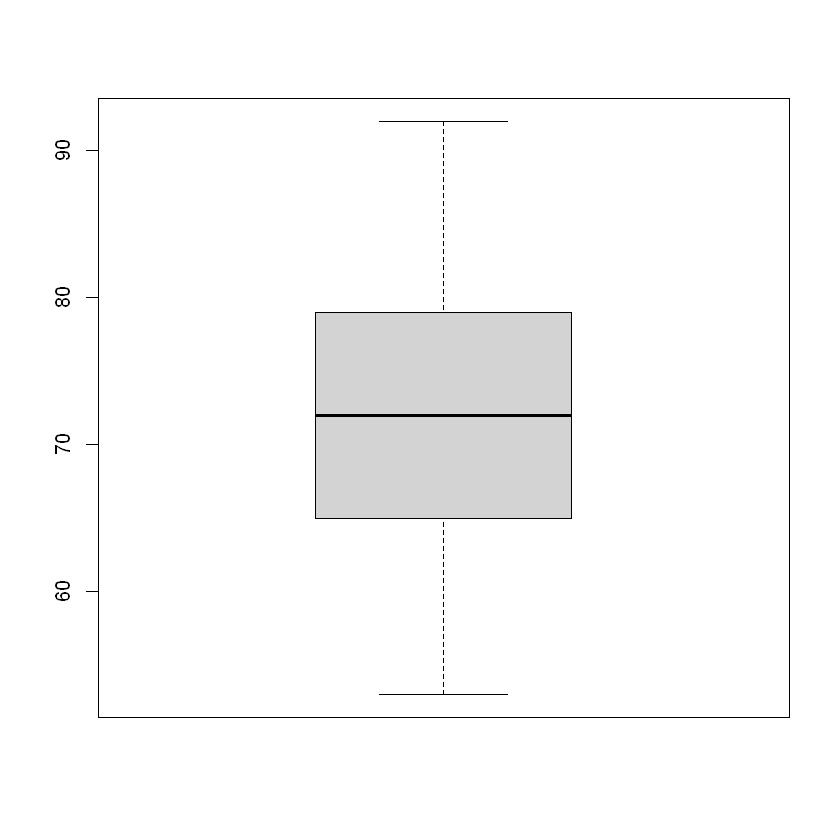

In [4]:
boxplot(score$Score)

**comment :**

# Variance

In [5]:
var(score$Score)

[1] 113.6619

# Ecart-type

In [6]:
sd(score$Score)

[1] 10.66123

## analyse bivariée

In [7]:
library(dplyr)
data <- mutate(score,
  Genre = factor(Genre),
  HeuresEtud = as.double(HeuresEtud)
)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
data

Individu,Genre,HeuresEtud,Score
<int>,<fct>,<dbl>,<int>
1,M,6.0,53
2,F,7.0,60
3,M,6.5,56
4,F,8.0,79
5,M,6.6,58
6,M,8.1,85
7,M,6.8,70
8,M,6.9,56
9,F,7.3,69


# Score et HeuresEtud  

In [9]:
attach(score)

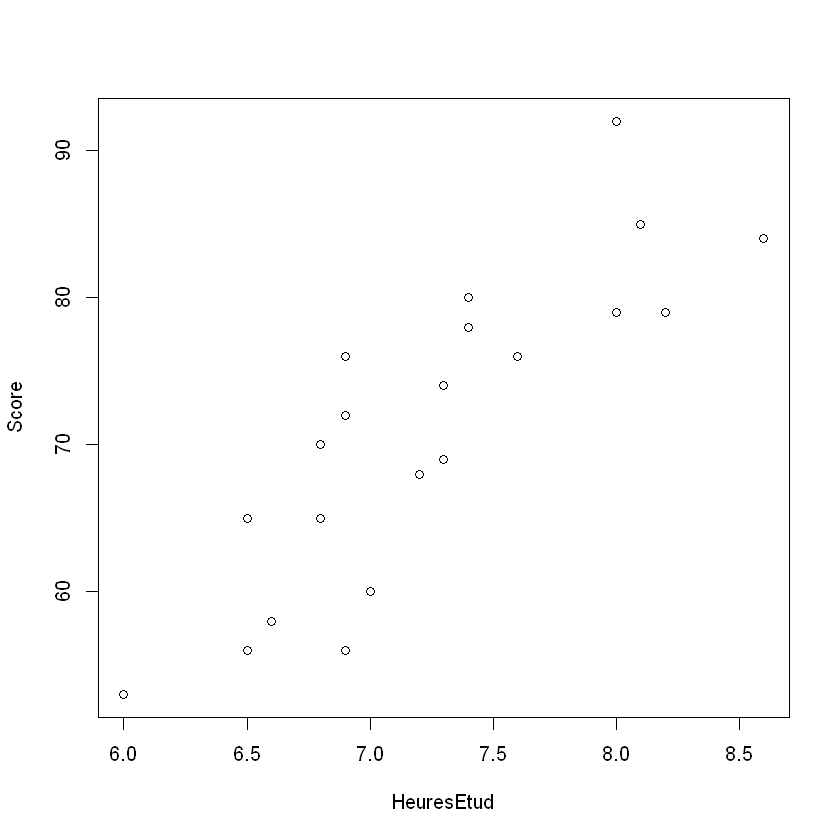

In [10]:
plot(HeuresEtud,Score)

In [11]:
r<-cor(data$HeuresEtud,Score)
cor.test(data$HeuresEtud,Score)


	Pearson's product-moment correlation

data:  data$HeuresEtud and Score
t = 6.9255, df = 19, p-value = 1.331e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6533236 0.9360326
sample estimates:
      cor 
0.8463214 


il ya une liaison entre les deux var

In [12]:
#shapiro-wilk ou kolmogorov smirnov
ks.test(Score,"pnorm")
shapiro.test(Score)

Warning message in ks.test.default(Score, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Score
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  Score
W = 0.97141, p-value = 0.7641


normal

In [13]:
#shapiro-wilk ou kolmogorov smirnov
ks.test(data$HeuresEtud, "pnorm")
shapiro.test(data$HeuresEtud)

Warning message in ks.test.default(data$HeuresEtud, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data$HeuresEtud
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  data$HeuresEtud
W = 0.96843, p-value = 0.698


normal

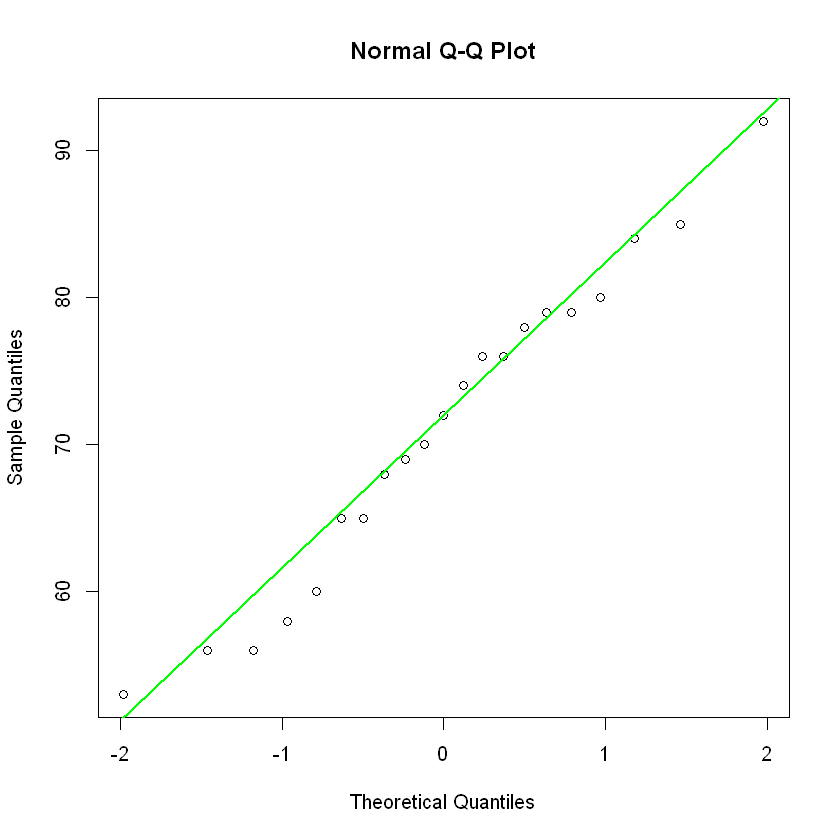

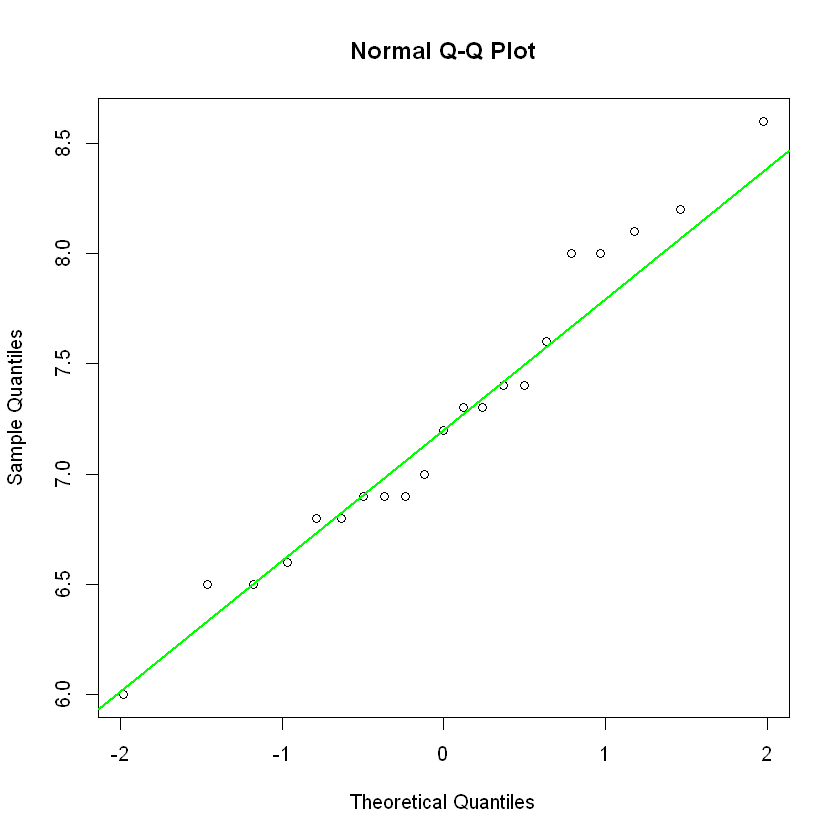

In [14]:
qqnorm(Score)
qqline(Score,col ='green',lwd=2)

qqnorm(data$HeuresEtud)
qqline(data$HeuresEtud,col ='green',lwd=2)


In [15]:
x <- data[0:21,3:4]
Xsc <- scale(x, scale = T)
head(Xsc)

,HeuresEtud,Score
1,-1.8783264,-1.706226
2,-0.3612166,-1.049642
3,-1.1197715,-1.424833
4,1.1558932,0.732516
5,-0.9680605,-1.237237
6,1.3076041,1.295303


## homogeneity

In [16]:
bartlett.test(x)


	Bartlett test of homogeneity of variances

data:  x
Bartlett's K-squared = 81.721, df = 1, p-value < 2.2e-16


non homogene

## La regression 

In [17]:
regxy <- lm(Xsc[,2] ~Xsc[,1] )
summary(regxy)


Call:
lm(formula = Xsc[, 2] ~ Xsc[, 1])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99073 -0.41795 -0.01816  0.43084  0.97363 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.569e-17  1.193e-01   0.000        1    
Xsc[, 1]     8.463e-01  1.222e-01   6.926 1.33e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5465 on 19 degrees of freedom
Multiple R-squared:  0.7163,	Adjusted R-squared:  0.7013 
F-statistic: 47.96 on 1 and 19 DF,  p-value: 1.331e-06


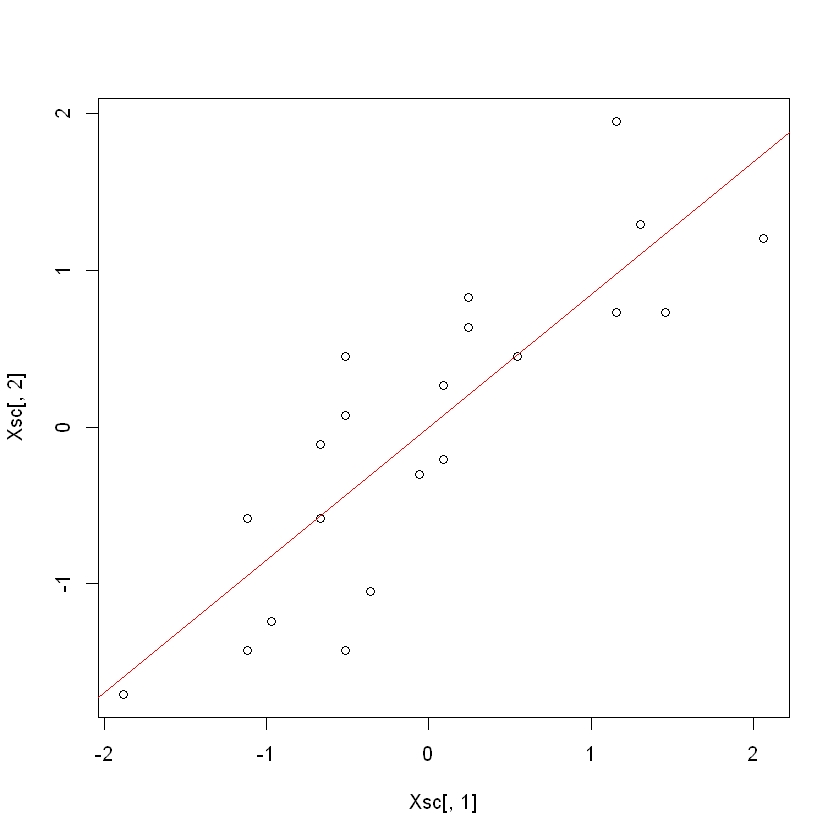

In [18]:
plot(Xsc[,1],Xsc[,2])
abline(0,8.463e-01, col = 'red')


	Shapiro-Wilk normality test

data:  residuals(regxy)
W = 0.97903, p-value = 0.9108


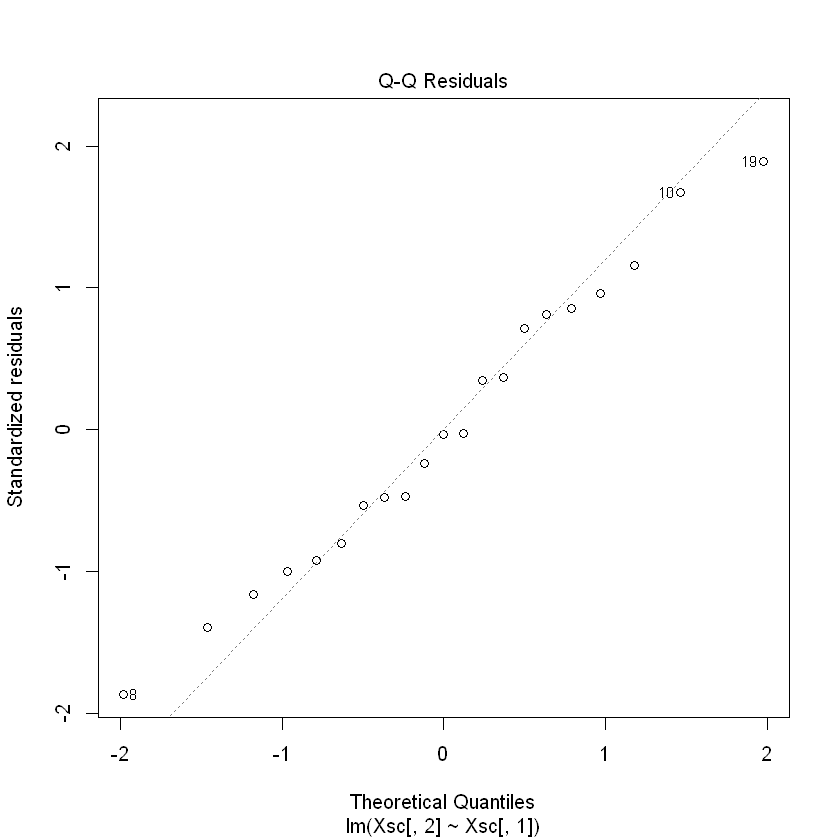

In [21]:
plot(regxy,2)
shapiro.test(residuals(regxy))


# Multivarier

## Anova (Genre,Score)

In [50]:
data <- data.frame(score=Score, genre=factor(Genre))
levels(data$genre)

[1] "F" "M"

In [51]:
library("dplyr")
library("rstatix")
library("ggpubr")

In [52]:
data %>% group_by(genre) %>% get_summary_stats(score, type = "mean_sd")

genre,variable,n,mean,sd
<fct>,<fct>,<dbl>,<dbl>,<dbl>
F,score,10,72.200,7.451
M,score,11,70.273,13.245


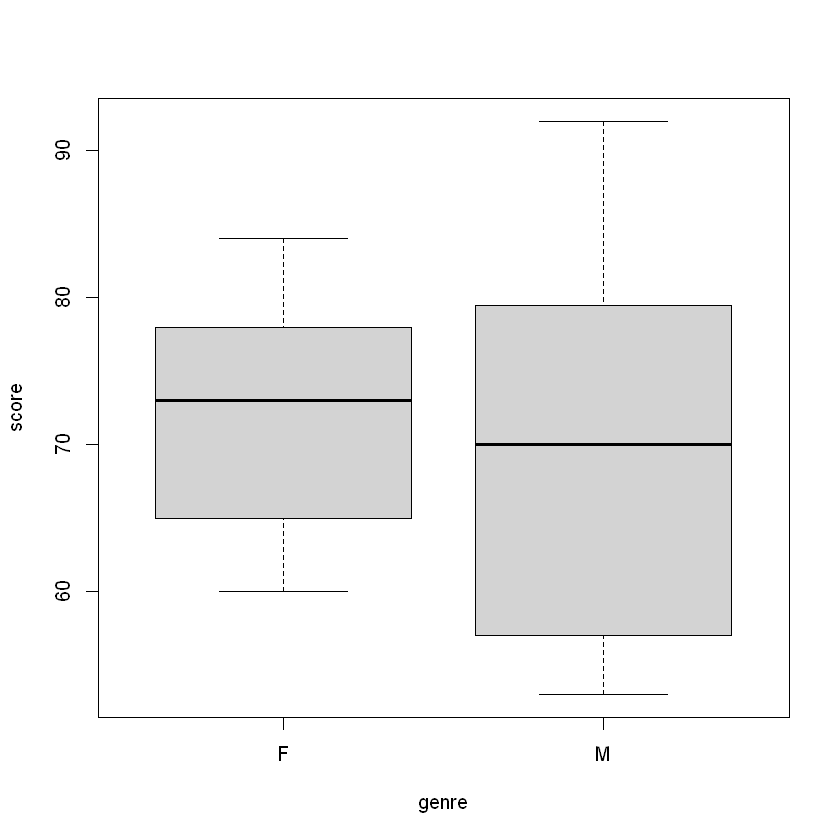

In [53]:
plot(score ~genre, data=data)

genre,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
F,score,0.9776890,0.9516107
M,score,0.9325563,0.4372881


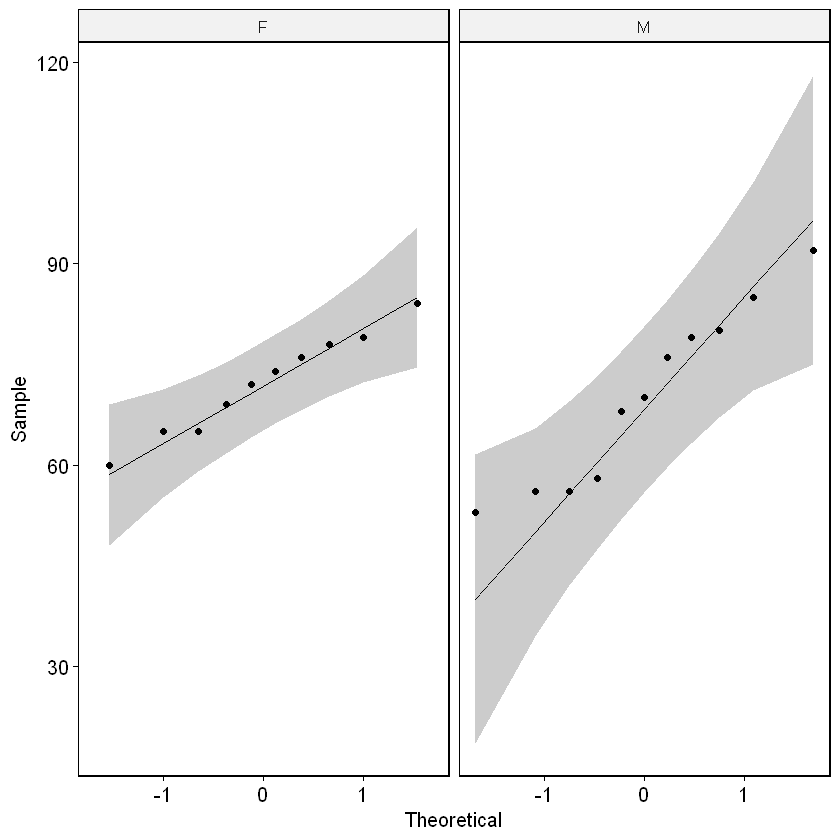

In [54]:
data %>% group_by(genre) %>% shapiro_test(score)
ggqqplot(data, "score", facet.by = "genre")

In [57]:
bartlett.test(Score ~ data$genre)


	Bartlett test of homogeneity of variances

data:  Score by data$genre
Bartlett's K-squared = 2.775, df = 1, p-value = 0.09575


In [58]:
rs.aov <- aov(score ~ genre, data )
summary(rs.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
genre        1   19.5   19.46   0.164   0.69
Residuals   19 2253.8  118.62               

## ANOVA (GENRE,HEURES-ETUDE)

In [59]:
data <- data.frame(Heure=as.double(HeuresEtud), genre=factor(Genre))
levels(data$genre)

[1] "F" "M"

In [60]:
data %>% group_by(genre) %>% get_summary_stats(Heure, type = "mean_sd")

genre,variable,n,mean,sd
<fct>,<fct>,<dbl>,<dbl>,<dbl>
F,Heure,10,7.270,0.622
M,Heure,11,7.209,0.720


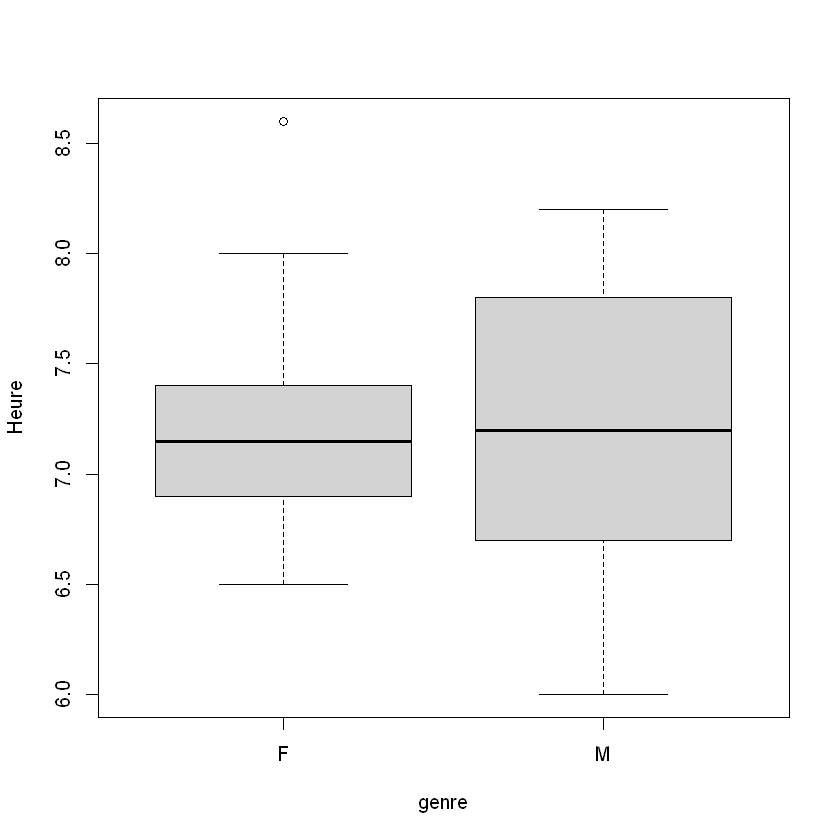

In [61]:
plot(Heure ~ genre, data=data)

In [62]:
data %>% group_by(genre) %>% identify_outliers(Heure)

genre,Heure,is.outlier,is.extreme
<fct>,<dbl>,<lgl>,<lgl>
F,8.6,TRUE,FALSE


genre,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
F,Heure,0.8978477,0.2074584
M,Heure,0.9569488,0.7331370


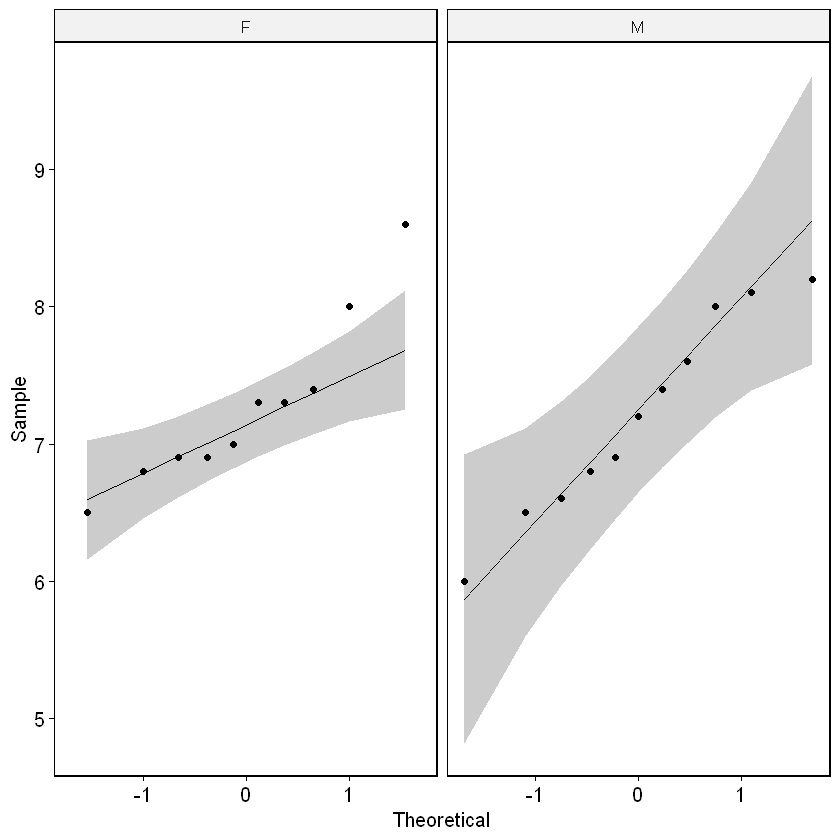

In [63]:
data %>% group_by(genre) %>% shapiro_test(Heure)
ggqqplot(data, "Heure", facet.by = "genre")

In [65]:
bartlett.test(data$Heure ~ data$genre)


	Bartlett test of homogeneity of variances

data:  data$Heure by data$genre
Bartlett's K-squared = 0.1926, df = 1, p-value = 0.6608


In [66]:
rs.aov <- aov(Heure ~ genre, data)
summary(rs.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
genre        1  0.019  0.0194   0.043  0.839
Residuals   19  8.670  0.4563               

### Conclusion :
- Donc le genre a aucun effet significatif sur les heures d'etudes et le score . 